Dataset Shape: (1427, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DateTime                     1427 non-null   object 
 1   Order ID                     1427 non-null   object 
 2   Customer ID                  1427 non-null   int64  
 3   Product ID                   1427 non-null   int64  
 4   Product Name                 1427 non-null   object 
 5   Product Category             1427 non-null   object 
 6   Units (Placed Orders)        1427 non-null   int64  
 7   Price Per Unit (MYR)         1427 non-null   float64
 8   Sales (Placed Orders) (MYR)  1427 non-null   float64
 9   Payment Method               1427 non-null   object 
 10  Discounts Applied (MYR)      1427 non-null   float64
 11  Shipping Costs (MYR)         1427 non-null   float64
 12  Order Status                 1427 non-null   objec

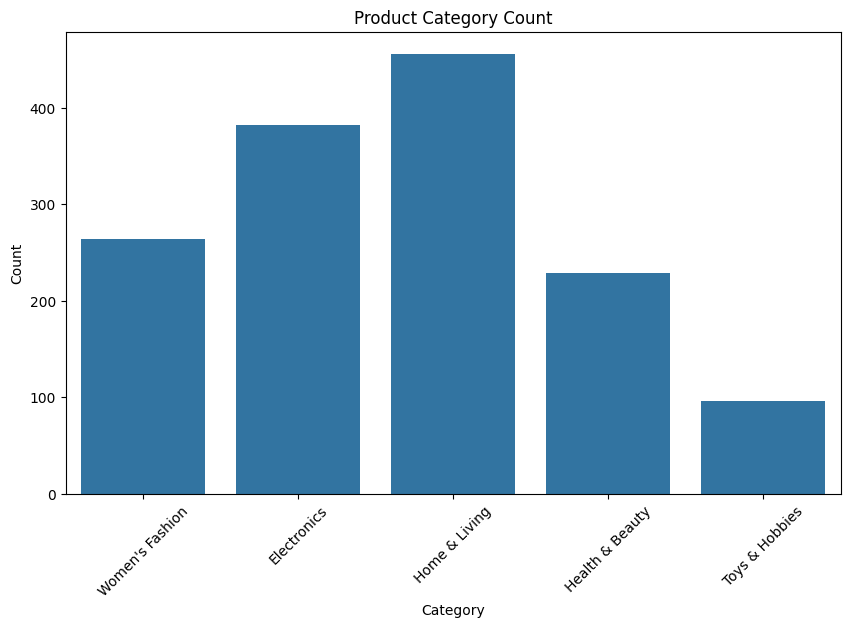

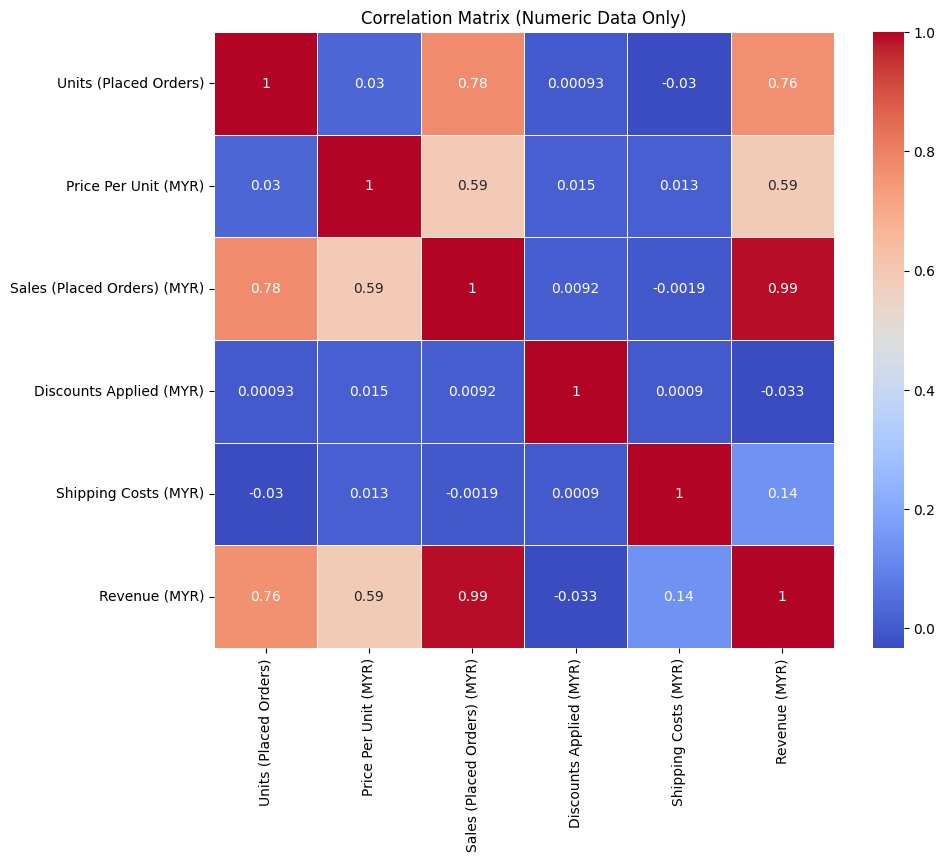

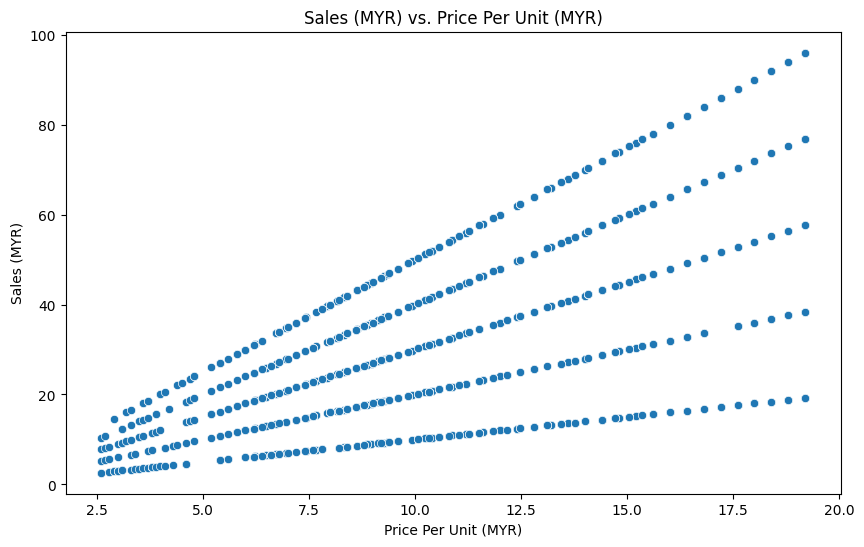

In [32]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
data = pd.read_csv('shopee_sales_report_2022_to_2024.csv')

# Step 3: Basic Data Inspection
print("Dataset Shape:", data.shape)
print("\nColumn Info:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

# Step 4: Check for duplicates and remove them if any
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)

# Step 5: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Step 6: Handle missing values (example: drop rows with missing values)
data.dropna(inplace=True)

# Step 7: Statistical Summary
print("\nStatistical Summary:\n", data.describe())

# Step 8: Drop unnecessary columns (after initial inspection)
data.drop(['Customer ID', 'Product ID'], axis=1, inplace=True)

# Step 9: Univariate Analysis - Count plot for Product Category
# A count plot visualizes the number of occurrences for each product category, helping identify which categories are most common.
plt.figure(figsize=(10, 6))
sns.countplot(x='Product Category', data=data)
plt.title("Product Category Count")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Step 10: Bivariate Analysis - Correlation Heatmap (Numeric Columns Only)
# A correlation heatmap displays the relationship between numeric variables, revealing potential dependencies or patterns in the data.
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Data Only)")
plt.show()

# Step 11: Bivariate Analysis - Sales vs. Price
# A scatter plot examining the relationship between unit price and sales, indicating if price impacts the sales amount.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Per Unit (MYR)', y='Sales (Placed Orders) (MYR)', data=data)
plt.title("Sales (MYR) vs. Price Per Unit (MYR)")
plt.xlabel("Price Per Unit (MYR)")
plt.ylabel("Sales (MYR)")
plt.show()